# Final Project: Wine Data Unsupervised Learning

GitHub link: https://github.com/annapav7/Unsupervised_Learning_FinalProject

##### Goal:

Provide an Unsupervised Learning problem resolution to Wine Data set to perform EDA and model analysis. 

##### Methods:

We will perform cluster analysis, an unsupervised learning task. 
We will accept that this dataset has no classes and search for patterns based on the attributes. 
The clustering will be performed with k-means approach and use Dimension Reduction by using PCA. 
Afterwards we will perform a k-means approach  and see if the total outcome of unsupervised learning will improve.

#### Table of Contents:

1. EDA - Exploratory Data Analysis
2. Normalizing Data
3. Evaluating Clustering Algorithm
4. k-Means Clustering
5. Dimensionality Reduction Using Principal Component Analysis (PCA)
6. After Dimensionality Reduction
7. Clustering After Reducing Dimensions
8. Summary / Conclusion

### Introduction:

In [18]:
# Import nessesary Packages:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline

ml.style.use('fivethirtyeight')
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples,silhouette_score

import seaborn as sns
from seaborn import heatmap, diverging_palette
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Data Description:

The datasets is included, related to  white vinho verde wine samples, from the north of Portugal. The dataset was downloaded from UCI Machine Learning Repository link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv. All variables are continuous. The last column of this dataset - quality, is the target data used for other data science tasks (e.g. classification) and will be dropped.

In [19]:
# importing data and creating dataframe
def load_dataset():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
    df = pd.read_csv(url, header=0, sep=';')
    df = df.iloc[:, :-1]
    return df

df = load_dataset()
df.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [20]:
#Size of Dataset:
df.shape

(4898, 11)

In [21]:
#Basic information
df.info()

#Describe the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


### 1. EDA - Exploratory Data Analysis:

EDA is done to understand the data andsummarize the data set.To detect outliers we will implement the IQR method. We will define the spread difference between the 75th and 25th percentiles of the data.

#### Exploring Dataset:

In [22]:
# displaying data types, null values, and possible outliers in each column
def dataframe_summary():
    
    # lists
    var_list = df.columns.to_list()
    dtype_list = []
    null_list = []
    
    # looping through columns
    for col in df.columns:
        dtype_list.append(df[col].dtype)
        null_list.append(df[col].isnull().sum())
    
    # outliers IQR
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3 - Q1
    k = 1.5
    outlier_list = ((df < (Q1 - k * IQR)) | (df > (Q3 + k * IQR))).sum().to_list()
    
    # stacking lists into dictionary
    dict = {'Variable': var_list, 'Data type': dtype_list, 'Null values': null_list, 'Outliers': outlier_list}
    
    return pd.DataFrame(dict).style.hide_index()
    
dataframe_summary()

Variable,Data type,Null values,Outliers
fixed acidity,float64,0,119
volatile acidity,float64,0,186
citric acid,float64,0,270
residual sugar,float64,0,7
chlorides,float64,0,208
free sulfur dioxide,float64,0,50
total sulfur dioxide,float64,0,19
density,float64,0,5
pH,float64,0,75
sulphates,float64,0,124


There are no missing values in the dataframe. All attributes are continuous and contain double-precision numbers. We summed up outliers for each variable.

We will proceed further and visualize outliers with box plots.

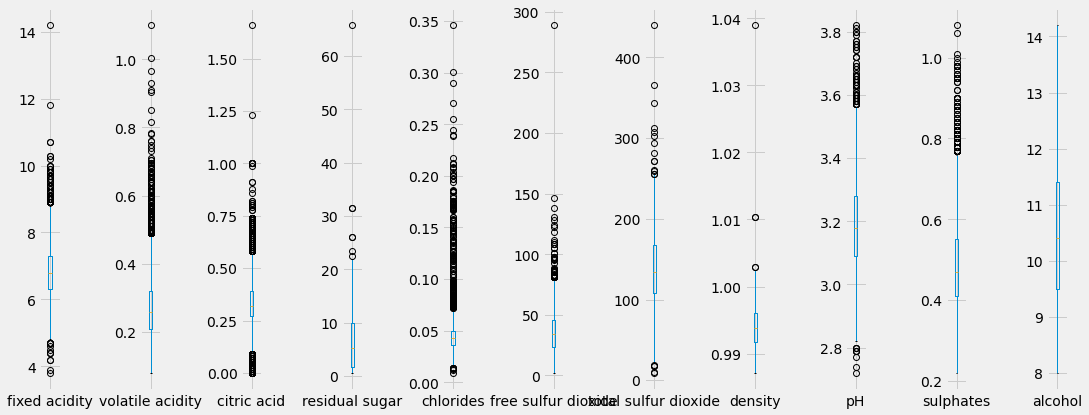

In [23]:
# plotting box plots
def plot_box_plots():
    fig, ax = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 6))
    
    # visualizing IQR results with box plots
    for i in range(len(df.columns)):
        df.boxplot(column=df.columns[i], ax=ax[i], vert=True)
    
    fig.tight_layout()
    plt.show()
        
plot_box_plots()

Only alcohol column has no outliers. The least outliers are visible for: residual sugar and density. The most errors are in: chlorides and volatile acidity.

[Text(0.5, 1.0, 'Plot of Alcohol Density')]

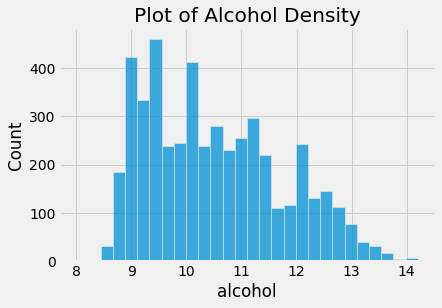

In [7]:
sns.histplot(
    data = df,
    x = 'alcohol',
    legend = False
).set(title = "Plot of Alcohol Density")

In [8]:
# removing duplicate rows
df = df.drop_duplicates()

# descriptive statistics of dataset
round(df.describe(), 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00
mean,6.84,0.28,0.33,5.91,0.05,34.89,137.19,0.99,3.20,0.49,10.59
std,0.87,0.10,0.12,4.86,0.02,17.21,43.13,0.00,0.15,0.11,1.22
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20


In [9]:
df.shape

(3961, 11)

We can see that size of Dataset reduced from (4898, 11) to (3961, 11). These rows do not bring much value in data modelling. Min value row displays 0.0 for citric acid column. This should be acceptable and not a measurement error.

#### Heat Map to see correlation between variables:

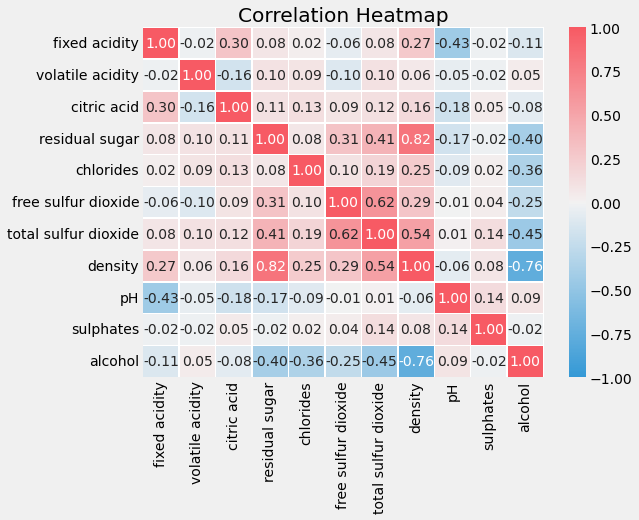

In [10]:
# plotting heatmap
def plot_heatmap():
    # custom colormap
    cmap = diverging_palette(240, 10, s=90, l=60, center='light', as_cmap=True)
    
    # plot heatmap
    plt.figure(figsize=(8, 6))
    heatmap(df.corr(method='pearson'), annot=True, cbar=True, vmin=-1, vmax=1, linewidths=.5, fmt='.2f', cmap=cmap)
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()



There are some strong, interesting co-dependencies between some of the features:

    alcohol vs. density;
    total sulfur dioxide (TSO2) vs. free sulfur dioxide (FSO2);
    density vs. residual sugar.



### 2. Normalizing Data

Clustering algorithms in geometrical context are distance based. Therefore, rescaling data is a must. We will implement the MinMaxScaler method from sklearn library. The transformation shifts the values as given:  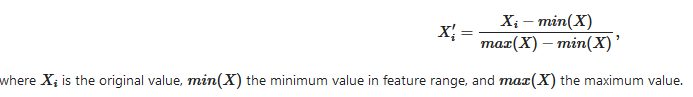

In [11]:
# normalizing data
def normalizing_data(data):
    # rescaling data
    scaler = MinMaxScaler()
    norm_features = scaler.fit_transform(data)
    return norm_features

df2 = normalizing_data(data=df)
df2

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.24545455, 0.27906977,
        0.22580645],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.56363636, 0.18604651,
        0.77419355],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.49090909, 0.11627907,
        0.61290323]])

### 3. Evaluating Clustering Algorithm

Clustering is an unsupervised learning method meaning we do not have the ground truth to compare the results to the true labels to check how well it worked. We can investigate clustering process in two ways:

    - visually - we try to investigate the structure of the data by splitting the data points into distinct subgroups;
    - with measures - we use scores and numbers to describe the performance; we will use: the silhouette score, Caliński-Harabasz score, and Davies-Bouldin index to evaluate the algorithms.


### 4. k-Means Clustering

This partitional grouping method is the most basic, frequently used, and for general purposes. It involves identifying the dataset's cluster centers that are distinct from one another. The k-means iteratively divides data points into k clusters (centers or groups) by minimizing the variance in each cluster. 

We will start the clustering process by choosing the appropriate number of centers. The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge. The SSE (or inertia) is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

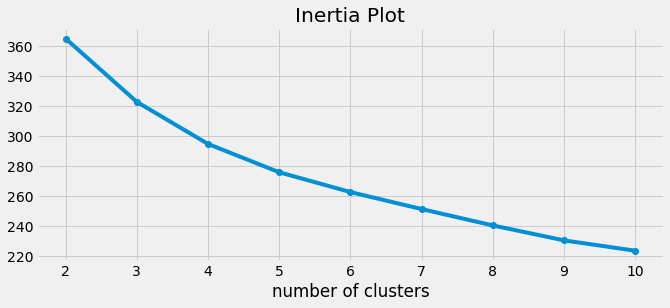

In [12]:
# finding optimal number of clusters
def kmeans_optimal_clusters(data):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    
    # sum of squared error = clusters inertia
    clusters_inertia = []
    
    # k-means properties
    kmeans_kwargs = {'init': 'k-means++', 'max_iter': 300}
    
    # calculate scores for clusters between 2 and 10
    for i in range(2, data.shape[1]):
        kmeans = KMeans(n_clusters=i, **kmeans_kwargs).fit(data)
        clusters_inertia.append(kmeans.inertia_)
    
    # visualize results
    plt.figure(figsize=(10, 4))
    plt.plot(range(2, data.shape[1]), clusters_inertia, marker='o', markersize=6)
    plt.xticks(np.arange(2, data.shape[1]))
    plt.title('Inertia Plot')
    plt.xlabel('number of clusters')
    plt.show()
    
kmeans_optimal_clusters(data=df2)

Determining the elbow point in the SSE curve is not always straightforward. This graph has no clear "elbow" visible. Three clusters should be a fair choice. Another way for choosing the best number of clusters is by silhouette scores and Caliński-Harabasz scores.

Number of Clusters = 2: 	Silhouette Score: 0.235841, 	Caliński-Harabasz Score: 1393.44157
Number of Clusters = 3: 	Silhouette Score: 0.181216, 	Caliński-Harabasz Score: 1045.651469
Number of Clusters = 4: 	Silhouette Score: 0.163437, 	Caliński-Harabasz Score: 888.259128
Number of Clusters = 5: 	Silhouette Score: 0.161187, 	Caliński-Harabasz Score: 778.944203
Number of Clusters = 6: 	Silhouette Score: 0.141188, 	Caliński-Harabasz Score: 694.240726
Number of Clusters = 7: 	Silhouette Score: 0.145007, 	Caliński-Harabasz Score: 633.867355
Number of Clusters = 8: 	Silhouette Score: 0.142419, 	Caliński-Harabasz Score: 588.697365
Number of Clusters = 9: 	Silhouette Score: 0.145384, 	Caliński-Harabasz Score: 562.388168
Number of Clusters = 10: 	Silhouette Score: 0.136871, 	Caliński-Harabasz Score: 533.615765


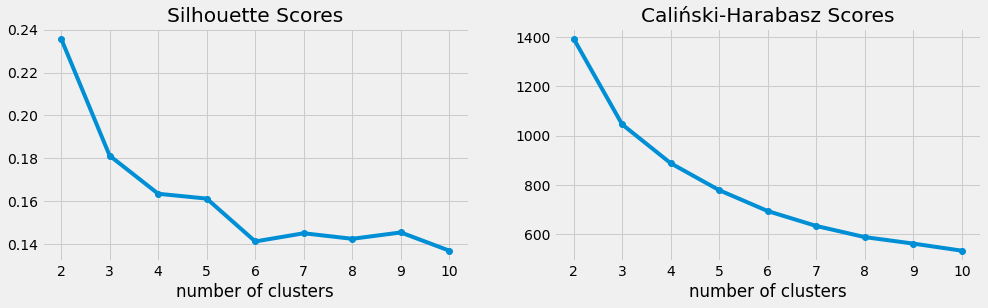

In [13]:
# finding optimal number of clusters with silhouette and Caliński-Harabasz coefficients
def kmeans_hyperparameter_tuning(data):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score, calinski_harabasz_score
    from sklearn.model_selection import ParameterGrid

    # grid of clusters for tuning
    parameters = list(range(2, data.shape[1]))

    # instantiating ParameterGrid
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    # k-means properties
    kmeans_kwargs = {'init': 'k-means++', 'max_iter': 300}
    
    # instantiating k-means model
    kmeans_model = KMeans(**kmeans_kwargs)
    # silhouette coefficients
    silhouette_scores = []
    # Caliński-Harabasz coefficients
    cal_har_scores = []

    # calculating scores for each cluster
    for i, j in zip(parameter_grid, parameters):
        kmeans_model.set_params(**i)
        kmeans_model.fit(data)

        # appending lists
        ss = silhouette_score(data, kmeans_model.labels_)
        chs = calinski_harabasz_score(data, kmeans_model.labels_)
        silhouette_scores += [ss]
        cal_har_scores += [chs]
        
        print('Number of Clusters = {}: \tSilhouette Score: {}, \tCaliński-Harabasz Score: {}'
              .format(j, round(ss, 6), round(chs, 6)))

    # visualizing results
    fig = plt.figure(figsize=(15, 4))
    
    # subplot 1
    plt.subplot(1, 2, 1)
    plt.plot(range(2, data.shape[1]), silhouette_scores, marker='o', markersize=6)
    plt.xticks(np.arange(2, data.shape[1]))
    plt.title('Silhouette Scores')
    plt.xlabel('number of clusters')
    
    # subplot 2
    plt.subplot(1, 2, 2)
    plt.plot(range(2, data.shape[1]), cal_har_scores, marker='o', markersize=6)
    plt.xticks(np.arange(2, data.shape[1]))
    plt.title('Caliński-Harabasz Scores')
    plt.xlabel('number of clusters')
    plt.show()

kmeans_hyperparameter_tuning(data=df2)

From visual analysis we can see a significant decrease from 2 clusters to three. Although, two clusters have the highest score value it might be too simplistic for this kind of data. The best option would be respectively three centers. We will provide this quantity in the training process.

Number of Fitted Variables: 11

#### Number of Instances Per Cluster ####
Cluster 0: 1567
Cluster 1: 1323
Cluster 2: 1071


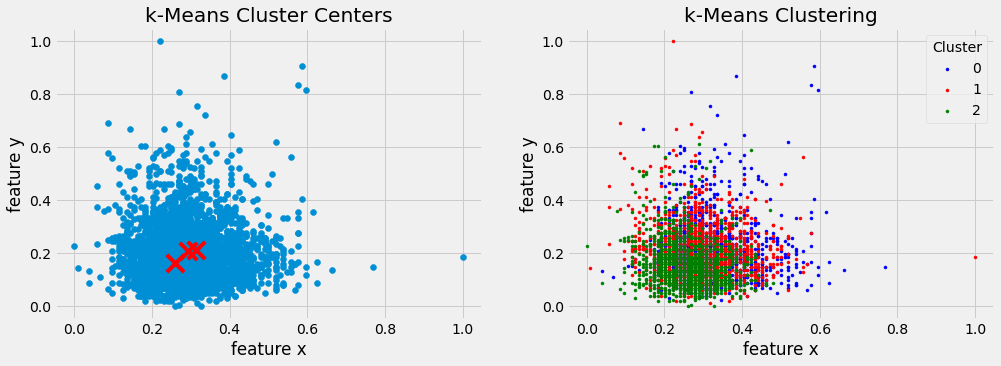

#### Centroid Coordinates [x, y] ####
Cluster 0: 	[0.313, 0.21]
Cluster 1: 	[0.293, 0.208]
Cluster 2: 	[0.26, 0.162]


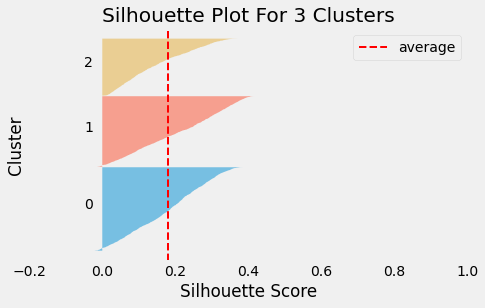

#### Model Validation ####
Average Silhouette Score: 0.1812164895631402
Caliński-Harabasz Score: 1045.651469320198
Davies-Bouldin Index: 1.7669657344711176


In [14]:
# performing k-means clustering
def kmeans_clustering(n_clusters, data):    
    # fitting model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300)
    pred_y = kmeans.fit_predict(data)
    
    # new data with predicted clusters
    array = np.append(data, pred_y.reshape(-1, 1), axis=1)
    
    # number of features
    print('Number of Fitted Variables:', kmeans.n_features_in_)
    
    # counting instances for each cluster
    print('\n#### Number of Instances Per Cluster ####')
    for i in range(0, n_clusters):
        print('Cluster {}: {}'.format(i, (array[:,-1] == i).sum()))
    
    # visualizing results
    plt.figure(figsize=(15, 5))
    
    # subplot 1
    plt.subplot(1, 2, 1)
    plt.scatter(x=data[:, 0], y=data[:, 1])
    plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
    plt.title('k-Means Cluster Centers')
    plt.xlabel('feature x')
    plt.ylabel('feature y')
    
    colors = ['blue', 'red', 'green', 'cyan', 'magenta']
    
    # subplot 2
    plt.subplot(1, 2, 2)
    for i, color in zip(range(0, n_clusters), colors):
        plt.scatter(x=array[:, 0][(array[:, -1] == i)], y=array[:, 1][(array[:, -1] == i)], marker='.', color=color, label=i)
        
    plt.title('k-Means Clustering')
    plt.xlabel('feature x')
    plt.ylabel('feature y')
    plt.legend(loc='best', title='Cluster')
    plt.show()
    
    print('#### Centroid Coordinates [x, y] ####')
    for i in range(0, n_clusters):
        print('Cluster {}: \t[{}, {}]'.format(i, round(kmeans.cluster_centers_[i, 0], 3),
                                          round(kmeans.cluster_centers_[i, 1], 3)))
    
    # subplot 3
    plt.figure(figsize=(7, 4))
    
    # silhouette score for each sample
    silhouette_vals = silhouette_samples(data, pred_y)
    
    y_lower, y_upper = 0, 0     
    for i in range(n_clusters):
        
        # grouping and sorting silhouette scores
        cluster_silhouette_vals = silhouette_vals[pred_y == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(y=np.arange(y_lower, y_upper), x1=0, x2=cluster_silhouette_vals, alpha=0.5, edgecolor=None)

        # cluster label at the middle
        plt.text(x=-0.05, y=(y_lower + y_upper) / 2, s=str(i))
        # new y_lower for next plot
        y_lower = y_upper + 10
    
    # plotting average silhouette score
    avg_score = (silhouette_vals).mean()
    plt.axvline(x=avg_score, color='red', linestyle='--', linewidth=2, label='average')
    plt.yticks([])
    plt.xlim([-0.2, 1])
    plt.title('Silhouette Plot For {} Clusters'.format(n_clusters))
    plt.xlabel('Silhouette Score')
    plt.ylabel('Cluster')
    plt.grid(axis='x')
    plt.legend(loc='upper right')
    plt.show()
    
    print('#### Model Validation ####')
    print('Average Silhouette Score:', silhouette_score(data, kmeans.labels_))
    print('Caliński-Harabasz Score:', calinski_harabasz_score(data, kmeans.labels_))
    print('Davies-Bouldin Index:', davies_bouldin_score(data, kmeans.labels_))

kmeans_clustering(n_clusters=3, data=df2)

The clustering is poor and far from perfect. We can see lots of overlapping within the data points. In geometrical content, each group has its own centroid (cluster center). The centroids are very close each other which also indicates poor grouping.

### 5. Dimensionality Reduction Using Principal Component Analysis (PCA)

The principal component analysis (PCA) is an unsupervised method which inverses a dataset so that these features are not statistically correlated. 

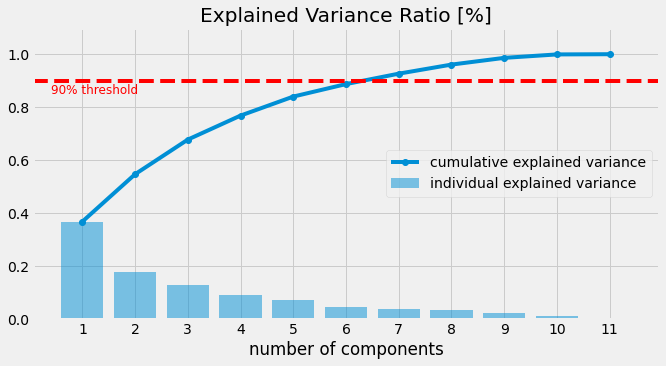

In [15]:
# finding optimal number of components with explained variance
def pca_optimal_components(data):
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    pca = PCA(n_components=None).fit(scaled_data)
    
    # percentage of variance explained by each of the selected components
    y = np.cumsum(pca.explained_variance_ratio_)
    
    # visualizing results
    plt.figure(figsize=(10, 5))
    plt.ylim(0.0, 1.1)
    
    plt.plot(range(1, data.shape[1]+1), y, marker='o', markersize=6, label='cumulative explained variance')
    plt.bar(range(1, data.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, label='individual explained variance')
    
    plt.title('Explained Variance Ratio [%]')
    plt.xlabel('number of components')
    
    plt.axhline(y=0.9, color='red', linestyle='--')
    plt.text(x=0.4, y=0.85, s='90% threshold', color='red', fontsize=12)
    plt.xticks(np.arange(1, data.shape[1]+1))
    plt.legend(loc='best')
    plt.show()

pca_optimal_components(data=df2)

The plot shows the variances explained by each variable. It displays that cumulative explained variance is inversed to individual explained variance. The line plot determines which principal components to keep and which ones to discard. Most of the time, we use enough eigenvectors so that they explain 95% to 99% of the variation in the dataset. By examining the above figure, we can conclude that first 6 dimensions contain most of the information.

### 6. After Dimensionality Reduction

In [16]:
# performing dimensionality reduction with PCA
def reduce_dimensionality(n_components, data):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.decomposition import PCA
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)
    return pca_result

df3 = reduce_dimensionality(n_components=6, data=df2)
df3

array([[-0.37376295, -0.1461661 ,  0.01459762,  0.0286885 ,  0.04700836,
        -0.05763429],
       [-0.12220269,  0.1014675 , -0.08277814, -0.02970811, -0.11097741,
         0.02710799],
       [-0.05556597, -0.02265431, -0.06342425, -0.05313953, -0.04707583,
         0.1466882 ],
       ...,
       [-0.14777124, -0.13990322, -0.008534  , -0.0900996 , -0.14365979,
        -0.1279622 ],
       [ 0.41409829,  0.04268417, -0.1525949 ,  0.03149197,  0.03856393,
        -0.03502136],
       [ 0.26234653, -0.05374422, -0.19160334, -0.0793331 ,  0.02902432,
        -0.01109314]])

### 7. Clustering After Reducing Dimensions

Number of Fitted Variables: 6

#### Number of Instances Per Cluster ####
Cluster 0: 1578
Cluster 1: 1303
Cluster 2: 1080


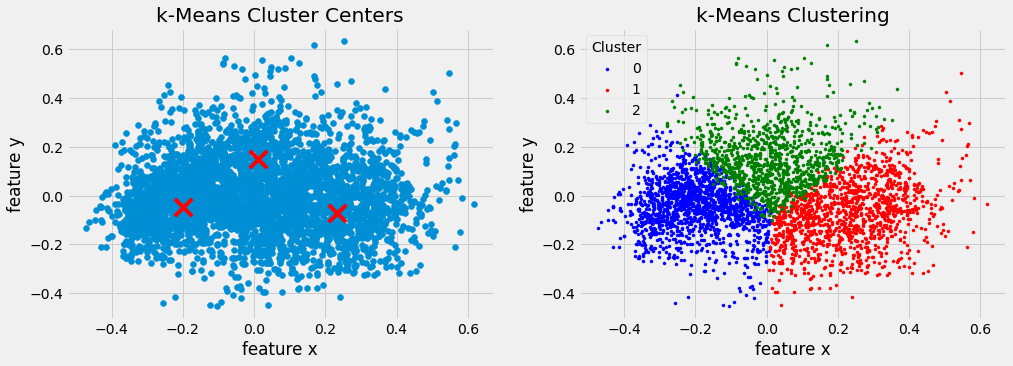

#### Centroid Coordinates [x, y] ####
Cluster 0: 	[-0.2, -0.045]
Cluster 1: 	[0.233, -0.07]
Cluster 2: 	[0.011, 0.149]


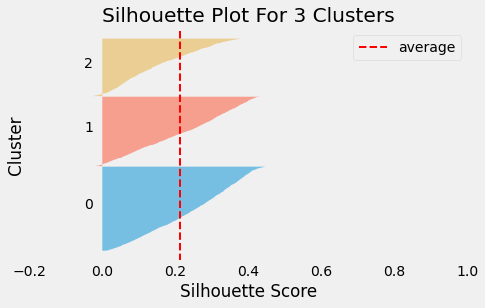

#### Model Validation ####
Average Silhouette Score: 0.21146568880052935
Caliński-Harabasz Score: 1261.7090586132394
Davies-Bouldin Index: 1.6025328154015608


In [17]:
# 1. k-means clustering
kmeans_clustering(n_clusters=3, data=df3)

### 8. Summary / Conclusion:

We can see final results after dimensionality reduction improved: 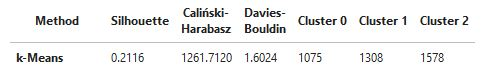
The scores are higher and clustering process looks more cleaner. 

### Before:

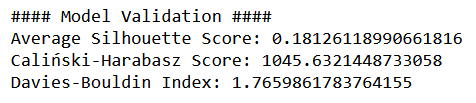

### After:
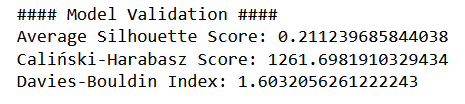

### Conclusion:

This project introduces the k-means and PCA unsupervised algorithms  that can be applied for exploratory data analysis and preprocessing on white wine dataset.
Right representation of data is crucial for Unsupervised Learning. Important parts of this are Preprocessing and Decomposition methods.

The dimensionality reduction of initial daaset is an essential tool to make sense of the data in the absence of supervision information. Applying PCA method improved the clustering
process. Any further enhancing should be in removing possible outliers in the dataset. Overall, clustering can be a useful exploration tool for identifying 
homogeneous groups and pattern recognition within the data. This approach could help us understand more about the data before performing supervised tasks and 
develop more refine models.